In [3]:
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from scipy.fftpack import dct
from scipy.fftpack import idct

In [4]:
"""
Returns an array of type:
 - [x, y] for grayscale images
 - [x, y, [R, G, B]] for RGB images
 - [x, y, [R, G, B, A]] for RGBA images
"""
def read_image(filename):
    img = image.imread(filename)
    return img

*3.2 função para criar colormap entre duas cores*

In [5]:
"""
Funcao para criar um colormap;
Parametros:
            1.cmin-> tuplo com valores (r,g,b) minimos
            2.cmax-> tuplo com valores (r,g,b) maximos
Devolve o objeto correspondente ao colormap
"""
def create_colormap(cmin : tuple[float], cmax: tuple[float]):
    return clr.LinearSegmentedColormap.from_list('', [cmin, cmax], N=256)

*3.3 Função para visualizar a imagem com um certo colormap*

In [6]:
"""
Função para mostrar uma imagem. Aceita um colormap definido pelo utilizador ou os do matplotlib
"""
    
def show_image(img, colormap = None):    
    plt.figure(figsize=(8,8))
    
    # Imagens com apenas uma coponenete: R, G, B ou Grayscale
    if len(img.shape) == 2:
        plt.imshow(img, cmap = colormap)
    else:
        if colormap != None:
            new_img = img[:, :, 0]
            plt.imshow(new_img, cmap = colormap)
        else:
            plt.imshow(img)

    plt.axis('off')
    plt.show()

> # Semana 1
Na diretória imagens estão presentes as imagens jpeg com baixa, média e alta qualidade, consoante os nomes das pastas;


*3.1 Leitura da imagem*

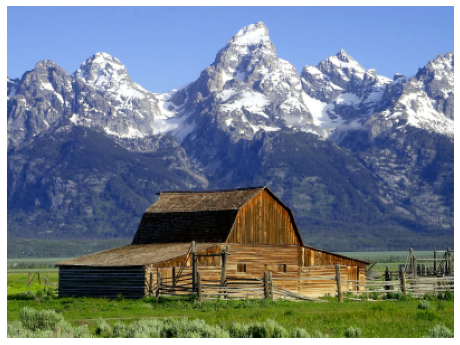

In [7]:
#img = read_image('imagens/peppers.bmp')
img = read_image('imagens/barn_mountains.bmp')
#img = read_image('imagens/logo.bmp')

show_image(img)


Tamanho dos ficheiros .bmp

|        | Barn | Peppers | Logo |
|:------:|:----:|:-------:|:----:|
|  size  |   356.5KB  |    589.9KB   |   421.6KB  |


<br>
Tamanho dos ficheiros após compressão para JPEG

|        | Barn | Peppers | Logo |
|:------:|:----:|:-------:|:----:|
|   Low  |   43.4KB  |    35.2KB    |   21.9KB  |
| Medium |   51.5KB  |    41.3KB    |   23.1KB  |
|  High  |   67.5KB  |    57.7KB    |   27.3KB  |

<br>
Rácio de compressão

|        | Barn | Peppers | Logo |
|:------:|:----:|:-------:|:----:|
|   Low  |   8.2:1  |    16.7:1    |   19.3:1  |
| Medium |   6.9:1  |    14.3:1    |   18.3:1  |
|  High  |   5.2:1  |    10.2:1    |   15.4:1  |

<br>
Diferenças subjetivas jpeg/bmp

|        | Barn                 | Peppers | Logo |
|:------:|:------------------:|:--------------:|:-----------------:|
|   Low  | não muito evidente | muito evidente     | evidente      |
| Medium | nada evidente      | não muito evidente | evidente      |
|  High  | nada evidente      | nada evidente      | nada evidente |

**TODO** A compressão aparenta ser mais evidente em imagens cujos pixels adjacentes têm uma cor bastante semelhante, sendo particularmente notável em casos em que as cores apresentam brilho elevado

In [8]:
low = image.imread('imagens/Low/peppers.jpg')
low.shape

(384, 512, 3)

In [9]:
medium = image.imread('imagens/Medium/peppers.jpg')
medium.shape

(384, 512, 3)

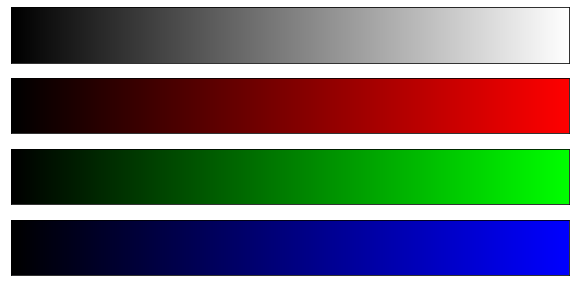

In [10]:
# ColorMaps
cm_gray = clr.LinearSegmentedColormap.from_list('gray', [(0,0,0), (1, 1, 1)], N = 256)
cm_red = clr.LinearSegmentedColormap.from_list('red', [(0,0,0), (1, 0, 0)], N = 256)
cm_green = clr.LinearSegmentedColormap.from_list('green', [(0,0,0), (0, 1, 0)], N = 256)
cm_blue = clr.LinearSegmentedColormap.from_list('blue', [(0,0,0), (0, 0, 1)], N = 256)


# Adaptado de https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html
cmap = plt.cm.get_cmap(cm_gray)
gray = cmap(np.arange(cmap.N))

cmap = plt.cm.get_cmap(cm_red)
red = cmap(np.arange(cmap.N))

cmap = plt.cm.get_cmap(cm_green)
green = cmap(np.arange(cmap.N))

cmap = plt.cm.get_cmap(cm_blue)
blue = cmap(np.arange(cmap.N))

fig, ax = plt.subplots(4, figsize=(10, 5),subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow([gray], extent=[0, 10, 0, 1])
ax[1].imshow([red], extent=[0, 10, 0, 1])
ax[2].imshow([green], extent=[0, 10, 0, 1])
ax[3].imshow([blue], extent=[0, 10, 0, 1])


*3.4 Função para separar imagem nos seus componentes R, G, B*

In [11]:
"""
Separar uma imagem RGB nos seus componentes
"""
def separate_components(img):
    r = img[:, :, 0]
    g = img[:, :, 1]
    b = img[:, :, 2]
    
    return r, g, b

*3.5 Visualização da imagem nos seus componentes R,G,B*

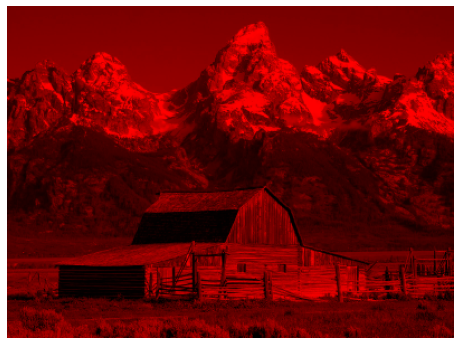

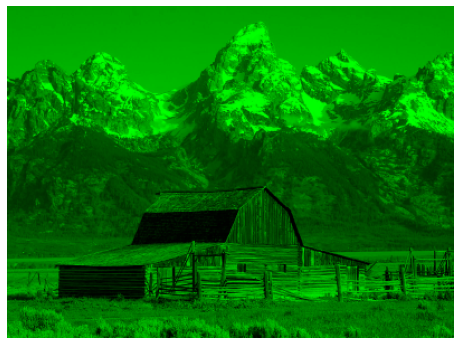

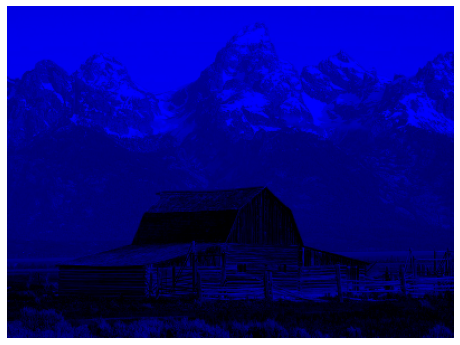

In [12]:
r, g, b = separate_components(img)
show_image(r, cm_red)
show_image(g, cm_green)
show_image(b, cm_blue)

In [13]:
"""
Juntar as coponentes R, G e B para formar uma imagem
"""
def join_components(r, g, b):
    return np.dstack((r, g, b))

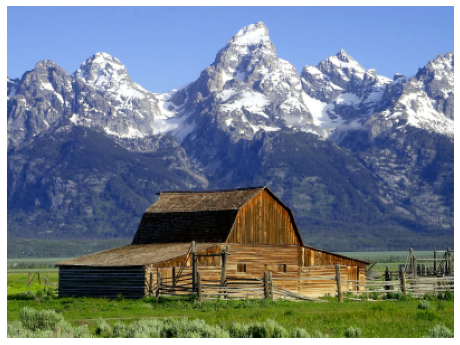

In [14]:
img = join_components(r, g, b)
show_image(img)

*4.1 Função para padding da imagem*

In [15]:
"""
Recebe uma imagem e altera as suas dimensões (m,n) para (16*p, 16*q).
Isto é realizado através da cópia da ultima coluna/linha até atingir o valor multiplo de 16.
Conta o numero de linhas/colunas adicionadas, (x,y) : 0<=x,y<=15.
Devolve um tuplo com as dimensoes incrementadas (x,y) e a imagem com as novas dimensoes (16*p, 16*q)
"""
def padding(img : np.array):
    img = img.copy()
    shape = img.shape
    
    x,y = img.shape[0]%16, img.shape[1]%16
    h_padding = np.repeat(img[-1:,:,:], x, axis = 0)
    img = np.concatenate((img, h_padding), axis = 0)

    v_padding = np.repeat(img[:,-1:,:], y, axis = 1)
    img = np.concatenate((img, v_padding), axis = 1)
    return shape, img

In [16]:
"""
Recebe uma imagem e as dimensoes originais dela.
Faz slice da imagem, elimando todos os elementos incrementados no padding;
Devolve a imagem original
"""
def unpad(img : np.array, shape):
    img = img.copy()
    x,y,z = shape
    img = img[:x, :y]
    return img

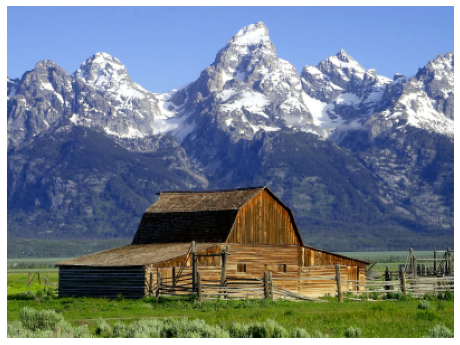

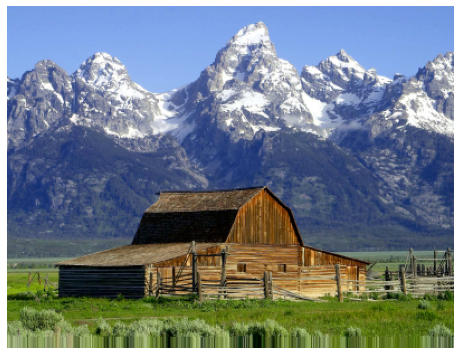

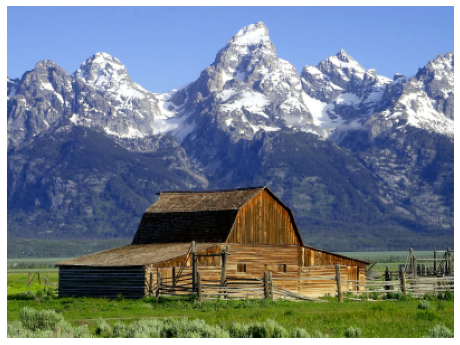

True
Original shape: (297, 400, 3)
Padding shape: (306, 400, 3)
After Padding and Unpadding shape: (297, 400, 3)


In [17]:
show_image(img)
shape, pad_img = padding(img)
show_image(pad_img)
unpad_img = unpad(img, shape)
show_image(unpad_img)

# Verificação que fica igual ao original
print(np.all(np.equal(img, unpad_img)))

print(f"Original shape: {img.shape}")
print(f"Padding shape: {pad_img.shape}")
print(f"After Padding and Unpadding shape: {unpad_img.shape}")

*5.1 Função de conversão RGB -> YcBcR*

In [18]:
"""
Converte imagem no formato RGB para imagem no formato yCbCr;
"""
def rgb_to_ycbcr(img : np.array):
    img.copy()
    
    y_cb_cr_mat = np.array([ [0.299    , 0.587    , 0.114    ]
                            ,[-0.168736, -0.331264, 0.5      ]
                            ,[0.5      , -0.418688, -0.081312] ])
    
    y  = y_cb_cr_mat[0,0] * img[:,:,0] + y_cb_cr_mat[0,1] * img[:,:,1] + y_cb_cr_mat[0,2]*img[:,:,2]
    cb = y_cb_cr_mat[1,0] * img[:,:,0] + y_cb_cr_mat[1,1] * img[:,:,1] + y_cb_cr_mat[1,2]*img[:,:,2] + 128
    cr = y_cb_cr_mat[2,0] * img[:,:,0] + y_cb_cr_mat[2,1] * img[:,:,1] + y_cb_cr_mat[2,2]*img[:,:,2] + 128
    
    y_cb_cr = np.dstack((y, cb, cr))
    return y_cb_cr

In [19]:
"""
Converte imagem no formato yCbCr para imagem no formato RGB;
"""
def ycbcr_to_rgb(img : np.array):
    img = img.copy()
    
    y_cb_cr_mat_inv = np.linalg.inv(
                                np.array([ [0.299    , 0.587    , 0.114    ]
                                        ,  [-0.168736, -0.331264, 0.5      ]
                                        ,  [0.5      , -0.418688, -0.081312] ])
                                    )
    y = img[:, :, 0]
    cb = img[:, :, 1] - 128
    cr = img[:, :, 2] - 128
    
    r = y + y_cb_cr_mat_inv[0,2]*cr
    g = y + y_cb_cr_mat_inv[1,1]*cb + y_cb_cr_mat_inv[1,2]*cr
    b = y + y_cb_cr_mat_inv[2,1]*cb
    
    rgb = np.dstack((r,g,b))
    rgb = np.round(rgb)
    rgb[rgb > 255] = 255
    rgb[rgb < 0] = 0
    
    return rgb.astype(np.uint8)

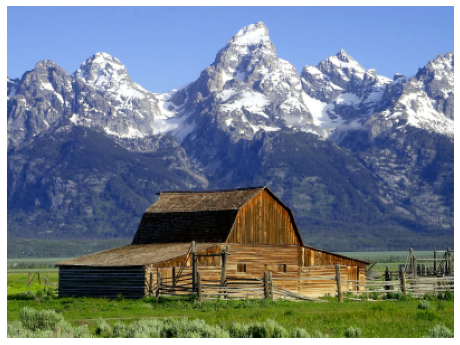

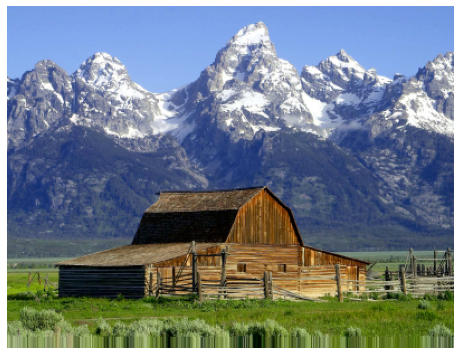

In [20]:
ycbcr = rgb_to_ycbcr(pad_img)
rgb = ycbcr_to_rgb(ycbcr)

# Verificação que fica igual ao original
#print(np.all(np.equal(img, rgb)))

show_image(img)
show_image(rgb)

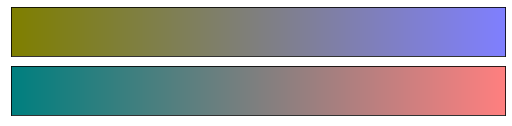

In [21]:
# Método do colormap para representar os canais Cb e Cr:
# https://stackoverflow.com/questions/28638848/displaying-y-cb-and-cr-components-in-matlab

cm_cb = clr.LinearSegmentedColormap.from_list('cb', [(0.5, 0.5, 0), (0.5, 0.5, 1)], N = 256)
cm_cr = clr.LinearSegmentedColormap.from_list('cr', [(0, 0.5, 0.5), (1, 0.5, 0.5)], N = 256)

cmap = plt.cm.get_cmap(cm_cb)
cm_cb_rep = cmap(np.arange(cmap.N))

cmap = plt.cm.get_cmap(cm_cr)
cm_cr_rep = cmap(np.arange(cmap.N))

fig, ax = plt.subplots(2, figsize=(10, 2),subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow([cm_cb_rep], extent=[0, 10, 0, 1])
ax[1].imshow([cm_cr_rep], extent=[0, 10, 0, 1])

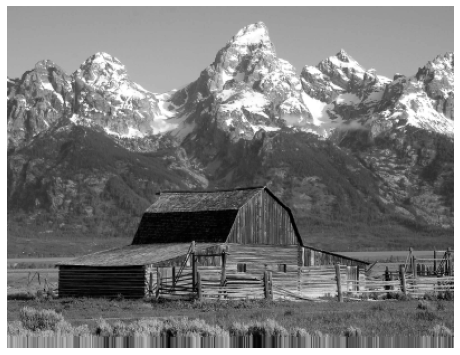

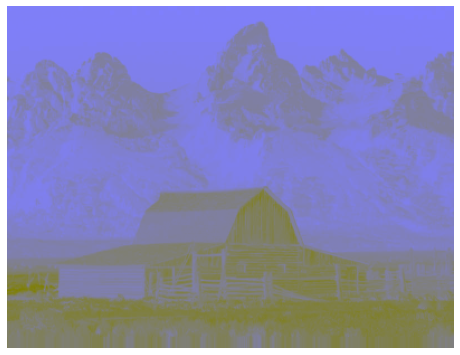

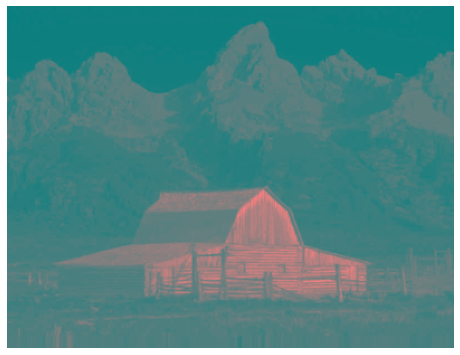

In [22]:
y, cb, cr = separate_components(ycbcr)

show_image(y, cm_gray)
show_image(cb, cm_cb)
show_image(cr, cm_cr)

*6.1 Downsample*

In [23]:
"""

"""
def sub_sample(y, cb, cr, downsample_ratio):
    y = y.copy()
    cb = cb.copy()
    cr = cr.copy()
    if downsample_ratio[-1] == 0:
        ratio = round(downsample_ratio[0]/downsample_ratio[1])
        cb = cb[::ratio,::ratio]
        cr = cr[::ratio,::ratio]
    else:
        v_ratio = round(downsample_ratio[0]/downsample_ratio[1])
        h_ratio = round(downsample_ratio[0]/downsample_ratio[2])
        cb = cb[:, ::v_ratio]
        cr = cr[:, ::v_ratio]
    return y,cb,cr

In [24]:
"""
funciona em -- (4,2,0) e (4,2,2) --
Parametros:
            1. y --------------> matriz com os valores da luminancia Y
            2. cb -------------> matriz downsampled de cb
            3. cr -------------> matriz downsample de cr
            4. upsample_ratio -> tuplo com 3 inteiros correspondentes ao ratio de downsample (Y:Cr:Cb)
"""
def const_up_sample(y, cb, cr, upsample_ratio):
    y = y.copy()
    cb = cb.copy()
    cr = cr.copy()
    
    cbArr = np.zeros(shape = y.shape)
    crArr = np.zeros(shape = y.shape)
    
    if upsample_ratio[-1] == 0:
        ratio = int(upsample_ratio[0]/upsample_ratio[1])
        
        cbArr[::ratio,::ratio] = cb
        cbArr[1::ratio,1::ratio] = cb
        
        crArr[::ratio,::ratio] = cr
        crArr[1::ratio,1::ratio] = cr
        
    else:
        cb_ratio = int(upsample_ratio[0]/upsample_ratio[1])
        cr_ratio = int(upsample_ratio[0]/upsample_ratio[2])
        
        cbArr[:,::cb_ratio] = cb
        cbArr[:,1::cb_ratio] = cb
        
        crArr[:,::cr_ratio] = cr
        crArr[:,1::cr_ratio] = cr
        
    return y,cbArr,crArr

In [25]:
"""
funciona em -- (4,2,0) e (4,2,2) --
Parametros:
            1. y --------------> matriz com os valores da luminancia Y
            2. cb -------------> matriz downsampled de cb
            3. cr -------------> matriz downsample de cr
            4. upsample_ratio -> tuplo com 3 inteiros correspondentes ao ratio de downsample (Y:Cr:Cb)
"""
def linear_up_sample(y, cb, cr, upsample_ratio):
    y = y.copy()
    cb = cb.copy()
    cr = cr.copy()
    
    new_cb = np.zeros(shape = y.shape)
    new_cr = np.zeros(shape = y.shape)
    
    if upsample_ratio[2] == 0:
        ratio = int(upsample_ratio[0]/upsample_ratio[1])
        #--------------------Cb interpolation----
        cb_cols_mean = (cb[:,:-1] + np.roll(cb, -1, 1)[:,:-1])//2
        cb_cols_mean = np.concatenate((cb_cols_mean, cb[:,-1:]), axis = 1)

        new_cb[::2,::2] = cb
        new_cb[::2,1::2] = cb_cols_mean

        cb = new_cb[::2]
        
        cb_lines_mean = (cb[:-1] + np.roll(cb, -1, 0)[:-1])//2
        cb_lines_mean = np.concatenate((cb_lines_mean, cb[-1:]), axis = 0)

        new_cb[1::2,:] = cb_lines_mean
        
        #------------------------Cr interpolation----
        cr_cols_mean = (cr[:,:-1] + np.roll(cr, -1, 1)[:,:-1])//2
        cr_cols_mean = np.concatenate((cr_cols_mean, cr[:,-1:]), axis = 1)

        new_cr[::2,::2] = cr
        new_cr[::2,1::2] = cr_cols_mean

        cr = new_cr[::2]
        
        cr_lines_mean = (cr[:-1] + np.roll(cr, -1, 0)[:-1])//2
        cr_lines_mean = np.concatenate((cr_lines_mean, cr[-1:]), axis = 0)

        new_cr[1::2,:] = cr_lines_mean
        
    else:
        cb_ratio = int(upsample_ratio[0]/upsample_ratio[1])
        cr_ratio = int(upsample_ratio[0]/upsample_ratio[2])
        
        cb_mean = (cb[:,:-1] + np.roll(cb, -1, 1)[:,:-1])/2
        cb_mean = np.concatenate((cb_mean, cb[:,-1:]), axis = 1)
        new_cb[:,::cb_ratio] = cb
        new_cb[:,1::cb_ratio] = cb_mean
        
        cr_mean = (cr[:,:-1] + np.roll(cr, -1, 1)[:,:-1])/2
        cr_mean = np.concatenate((cr_mean, cr[:,-1:]), axis = 1)
        new_cr[:,::cr_ratio] = cr
        new_cr[:,1::cr_ratio] = cr_mean
    
    return y,new_cb, new_cr

In [26]:
#ratio = (4, 2, 2)
ratio = (4, 2, 0)
y_d, cb_d, cr_d = sub_sample(y, cb, cr, ratio)

In [27]:
def dct_(a):
    return dct(dct(a, norm="ortho").T, norm = "ortho").T

In [28]:
def idct_(a_dct):
    return idct(idct(a_dct, norm='ortho').T, norm='ortho').T

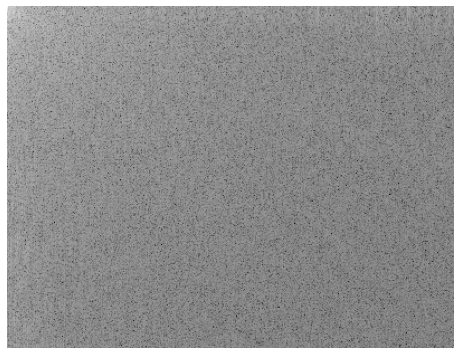

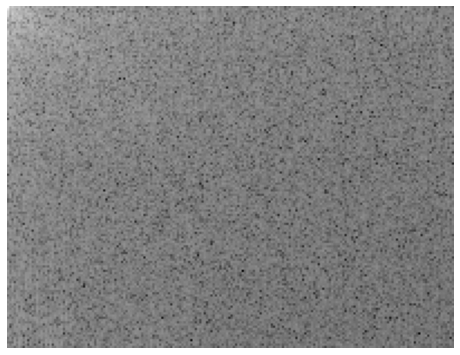

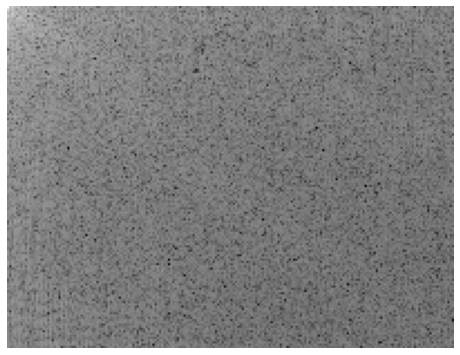

In [29]:
#DCT

y_dct = dct_(y_d)
cb_dct = dct_(cb_d)
cr_dct = dct_(cr_d)

show_image(np.log(np.abs(y_dct) + 0.0001), cm_gray)
show_image(np.log(np.abs(cb_dct) + 0.0001), cm_gray)
show_image(np.log(np.abs(cr_dct) + 0.0001), cm_gray)

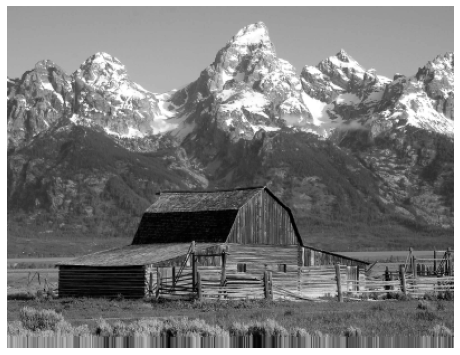

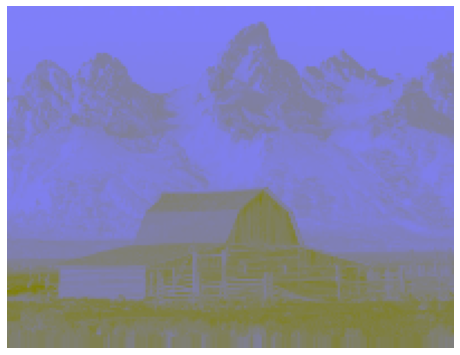

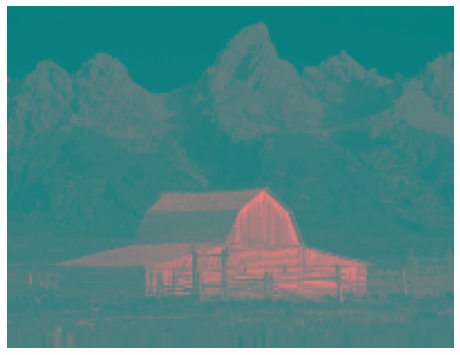

In [30]:
# Inverso da DCT

y_idct = idct_(y_dct)
cb_idct = idct_(cb_dct)
cr_idct = idct_(cr_dct)

show_image(y_idct, cm_gray)
show_image(cb_idct, cm_cb)
show_image(cr_idct, cm_cr)

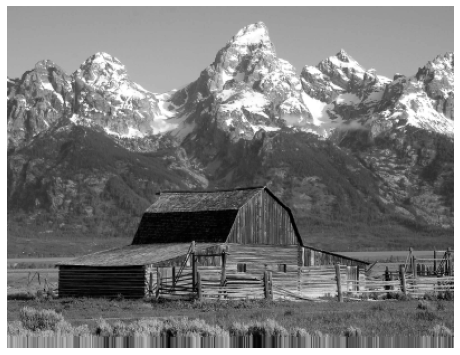

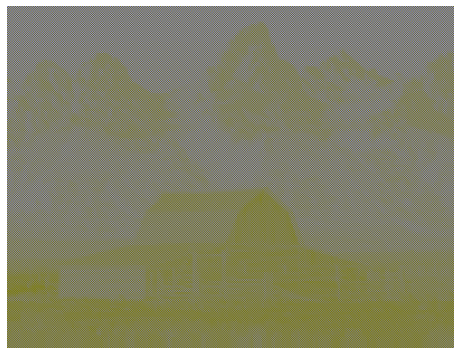

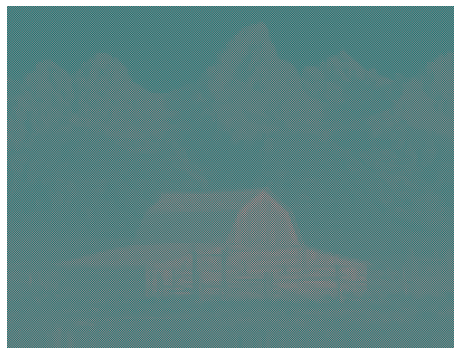

In [31]:
# Reconstrução com copia da coluna da esquerda

y, cb, cr = const_up_sample(y_idct, cb_idct, cr_idct, ratio)

show_image(y, cm_gray)
show_image(cb, cm_cb)
show_image(cr, cm_cr)

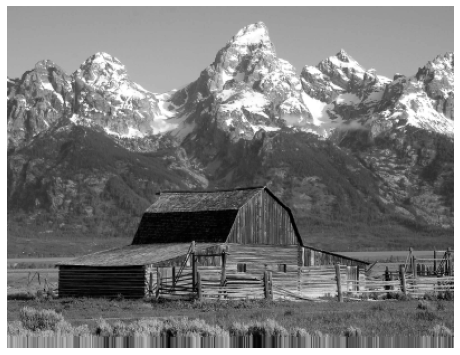

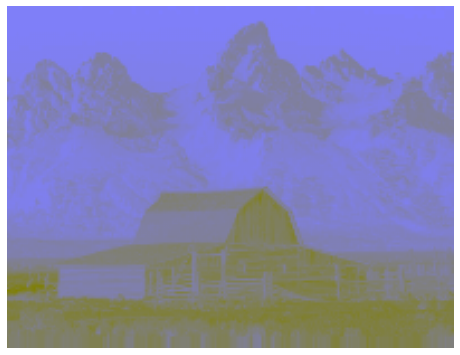

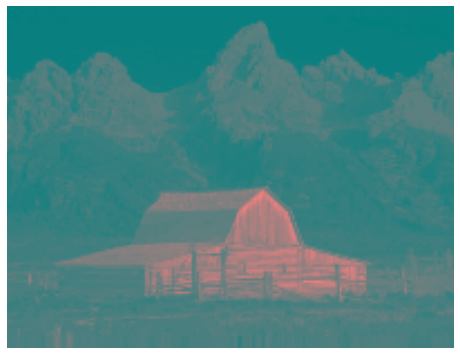

In [32]:
#Recontrução com interpolação linear (média) da coluna anterior e seguinte

y, cb, cr = linear_up_sample(y_idct, cb_idct, cr_idct, ratio)

show_image(y, cm_gray)
show_image(cb, cm_cb)
show_image(cr, cm_cr)

In [58]:
def dct_n_blocks(y, cb, cr, step):
    dct_y = np.zeros(y.shape)
    dct_cb = np.zeros(cb.shape)
    dct_cr = np.zeros(cr.shape)
    
    for i in range(0, y.shape[0], step):
        for j in range(0, y.shape[1], step):
            dct_y[i:i+step, j:j+step] = dct_(y[i:i+step, j:j+step])
    
    for i in range(0, cb.shape[0], step):
        for j in range(0, cb.shape[1], step):
            dct_cb[i:i+step, j:j+step] = dct_(cb[i:i+step, j:j+step])
            dct_cr[i:i+step, j:j+step] = dct_(cr[i:i+step, j:j+step])
            
    return dct_y, dct_cb, dct_cr

In [59]:
def idct_n_blocks(y_dct, cb_dct, cr_dct, step):
    idct_y = np.zeros(y_dct.shape)
    idct_cb = np.zeros(cb_dct.shape)
    idct_cr = np.zeros(cr_dct.shape)
    
    for i in range(0, y_dct.shape[0], step):
        for j in range(0, y_dct.shape[1], step):
            idct_y[i:i+step, j:j+step] = idct_(y_dct[i:i+step, j:j+step])
    
    for i in range(0, cb_dct.shape[0], step):
        for j in range(0, cb_dct.shape[1], step):
            idct_cb[i:i+step, j:j+step] = idct_(cb_dct[i:i+step, j:j+step])
            idct_cr[i:i+step, j:j+step] = idct_(cr_dct[i:i+step, j:j+step])
            
    return idct_y, idct_cb, idct_cr

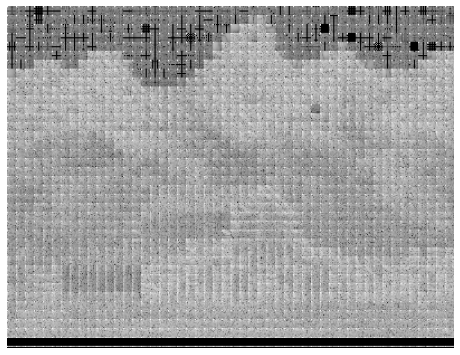

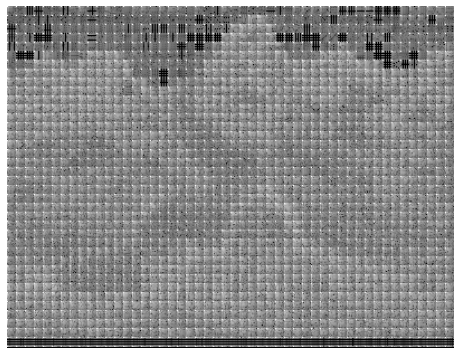

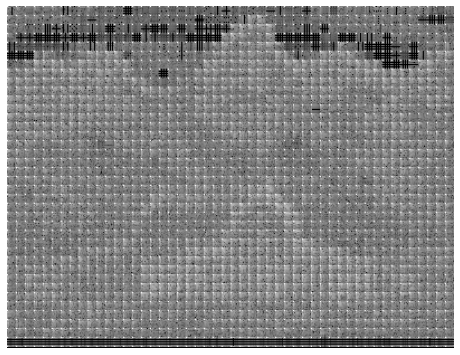

In [60]:
n = 8
y_dctn, cb_dctn, cr_dctn = dct_n_blocks(y, cb, cr, n)

show_image(np.log(np.abs(y_dctn) + 0.0001), cm_gray)
show_image(np.log(np.abs(cb_dctn) + 0.0001), cm_gray)
show_image(np.log(np.abs(cr_dctn) + 0.0001), cm_gray)

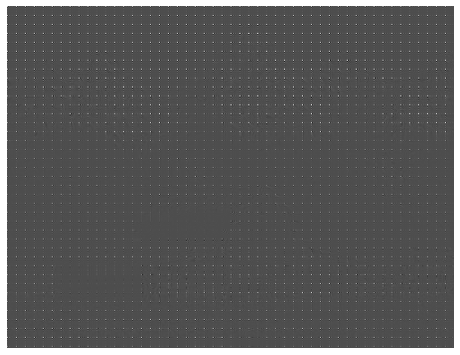

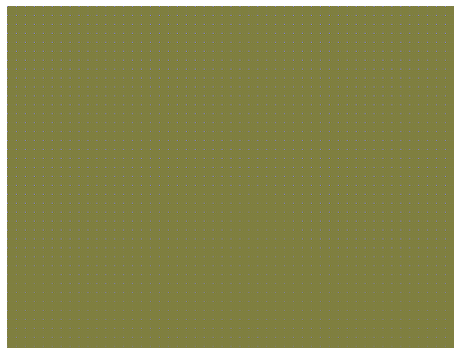

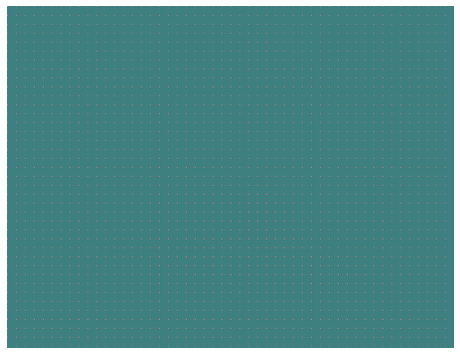

In [61]:
y_d, cb_d, cr_d = idct_n_blocks(y, cb, cr, n)

show_image(y_d, cm_gray)
show_image(cb_d, cm_cb)
show_image(cr_d, cm_cr)

In [53]:
def encoder(filename, ratio, n):
    img = read_image(filename)
    
    shape, pad_img = padding(img)
    
    ycbcr = rgb_to_ycbcr(pad_img)
    
    y, cb, cr = separate_components(ycbcr)
    
    y_d, cb_d, cr_d = sub_sample(y, cb, cr, ratio)
    
    #y_dct, cb_dct, cr_dct = dct_(y_d), dct_(cb_d), dct_(cr_d)
    y_dct, cb_dct, cr_dct = dct_n_blocks(y_d, cb_d, cr_d, n)
    
    return y_dct, cb_dct, cr_dct, shape
    

In [56]:
def decoder(y_dct, cb_dct,  cr_dct, ratio, shape, n):
    
    #y_idct, cb_idct, cr_idct = idct_(y_d), idct_(cb_d), idct_(cr_d) # DCT na imagem toda
    y_idct, cb_idct, cr_idct = dct_n_blocks(y_dct, cb_dct, cr_dct, n) # DCT em blocos n x n

    #y, cb, cr = const_up_sample(y_idct, cb_idct, cr_idct, ratio) # Upsample: cópia da coluna á esquerda
    y, cb, cr = linear_up_sample(y_idct, cb_idct, cr_idct, ratio) # Upsample: média entre o anterior e o seguinte
    
    ycbcr = join_components(y, cb, cr)
    
    img_ycbcr = unpad(ycbcr, shape)
    
    img_rgb = ycbcr_to_rgb(img_ycbcr)
    
    return img_rgb

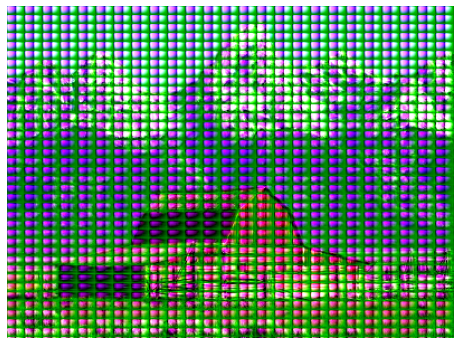

(297, 400, 3)


In [57]:
# Encode
ratio = (4, 2, 2)
n = 8
y_dct, cb_dct, cr_dct, shape = encoder('imagens/barn_mountains.bmp', ratio, n)

# Decode
img = decoder(y_dct, cb_dct, cr_dct, ratio, shape, n)
show_image(img)
print(img.shape)